# AMAZON REVIEW SENTIMENT ANALYSIS

##### Analysing the reviews of toys on amazon based on sentiments

## 

In [2]:
pip install nltk scikit-learn

In [1]:
import nltk
#download NLTK data
nltk.download('vader_lexicon')
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.probability import FreqDist

from wordcloud import WordCloud
#from matplotlib.figure import figsize
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to C:\Users\Ankit's
[nltk_data]     PREDATOR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ankit's
[nltk_data]     PREDATOR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ankit's
[nltk_data]     PREDATOR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv(r"D:\Rohini Personal\Portfolio Builder-20231213T063832Z-001\9. E-commerce – Amazon Review Analysis\amazon_reviews.csv")

# Reviews Distribution by Sentiments 

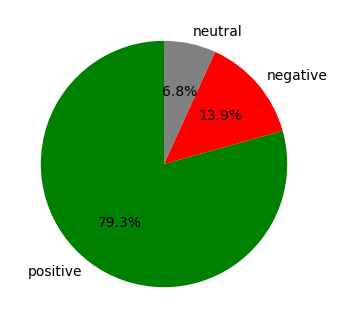

In [5]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
        return ' '.join(filtered_words)
    elif isinstance(text, list):
        # If the input is a list, join the elements into a string
        text = ' '.join(map(str, text))
        words = word_tokenize(text)
        filtered_words = [word.lower() for word in words if isinstance(word, str) and word.isalpha() and word.lower() not in stop_words]
        return ' '.join(filtered_words)
    else:
        # Handle other cases by returning an empty string
        return ''
df['processed_text'] = df['reviewText'].apply(preprocess_text)

from nltk.sentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
df['compound_score']= df['processed_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment'] = df['compound_score'].apply(lambda score: 'positive' if score>0 else ('negative' if score<0 else 'neutral'))

sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize = (4,4))
plt.pie(sentiment_counts,labels = sentiment_counts.index, autopct = '%1.1f%%',startangle = 90, colors = ['green','red','gray'])
plt.show()

### Positive Reviews

#### Ratings given by people who gave positive reviews


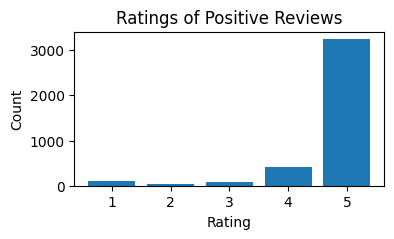

In [76]:
df_positive = df[df['sentiment']=='positive']
Overall_count = df_positive['overall'].value_counts()
plt.figure(figsize = (4,2))
plt.bar(x = Overall_count.index , height = Overall_count.values, data = df_positive )
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ratings of Positive Reviews")
plt.show()

In [38]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


#### Most Frequesnt words in Positive Reviews

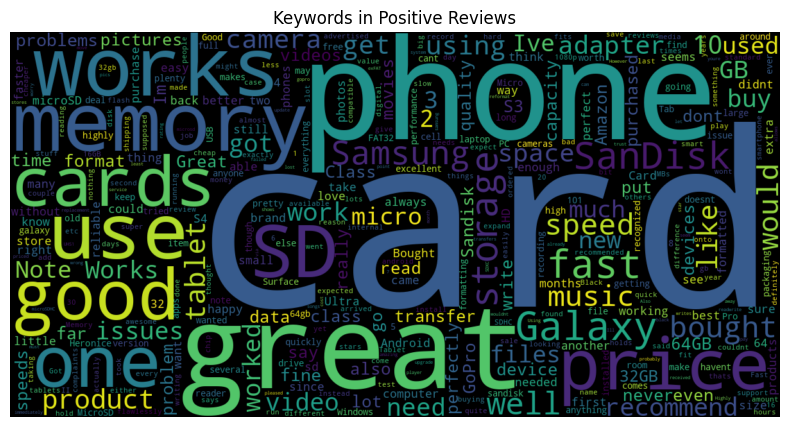

In [77]:
import string
positive_text = ' '.join(df_positive['reviewText']) #getting text
positive_text = positive_text.translate(str.maketrans("", "",string.punctuation)) #remove punctuation symbol
positive_tokens = word_tokenize(positive_text) #split the text into words
stop_words2 = set(stopwords.words('english'))
positive_filtered = [word for word in positive_tokens if word.lower() not in stop_words2] #remove stopewords(a,like,the,an,of)
positive_freq_dist = FreqDist(positive_filtered)
#Wordcloud of keywords
wordcloud = WordCloud(width = 1200, height = 600, max_words = 400, background_color = 'black').generate_from_frequencies(positive_freq_dist)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Keywords in Positive Reviews")
plt.show()

### Neutral Reviews

####  Ratings given by people who gave Neutral reviews


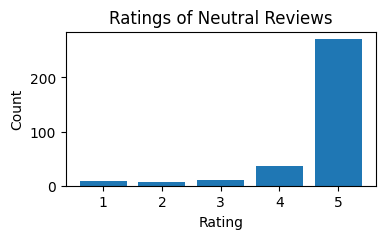

In [74]:
df_neutral = df[df['sentiment']=='neutral']
Overall_count = df_neutral['overall'].value_counts()
plt.figure(figsize = (4,2))
plt.bar(x = Overall_count.index , height = Overall_count.values, data = df_neutral )
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ratings of Neutral Reviews")
plt.show()

#### Most Frequesnt words in Neutral Reviews

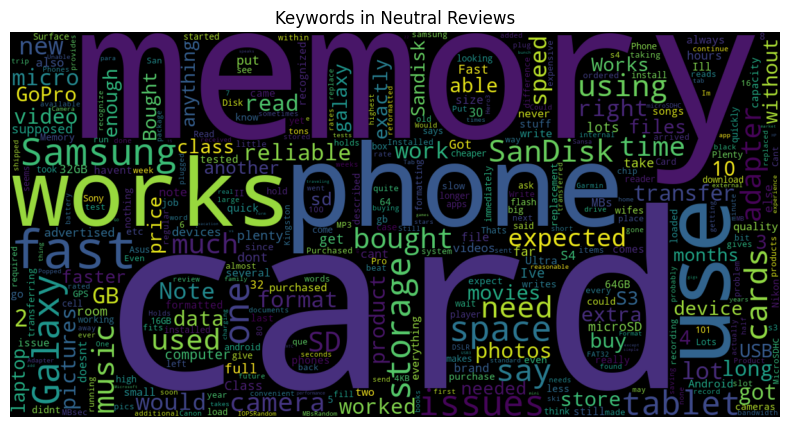

In [73]:
import string
neutral_text = ' '.join(df_neutral['reviewText']) #getting text
neutral_text = neutral_text.translate(str.maketrans("", "",string.punctuation)) #remove punctuation symbol
neutral_tokens = word_tokenize(neutral_text) #split the text into words
stop_words2 = set(stopwords.words('english'))
neutral_filtered = [word for word in neutral_tokens if word.lower() not in stop_words2] #remove stopewords(a,like,the,an,of)
neutral_freq_dist = FreqDist(neutral_filtered)
#Wordcloud of keywords
wordcloud = WordCloud(width = 1200, height = 600, max_words = 400, background_color = 'black').generate_from_frequencies(neutral_freq_dist)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Keywords in Neutral Reviews")
plt.show()

### Negative Reviews

####  Ratings given by people who gave Negative reviews


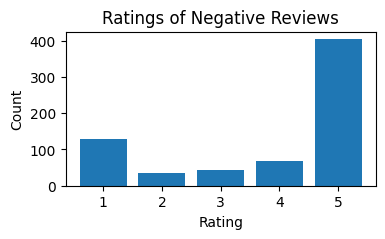

In [71]:
df_negative = df[df['sentiment']=='negative']
Overall_count = df_negative['overall'].value_counts()
plt.figure(figsize = (4,2))
plt.bar(x = Overall_count.index , height = Overall_count.values, data = df_negative )
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ratings of Negative Reviews")
plt.show()

#### Most Frequent words in Negative reviews

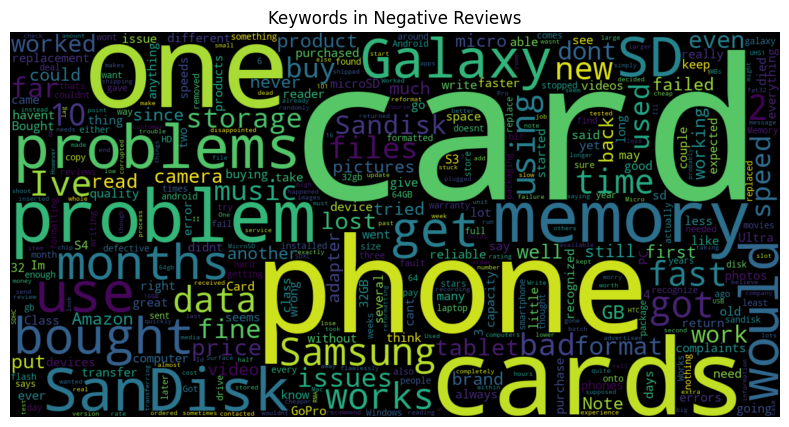

In [70]:
import string
negative_text = ' '.join(df_negative['reviewText']) #getting text
negative_text = negative_text.translate(str.maketrans("", "",string.punctuation)) #remove punctuation symbol
negative_tokens = word_tokenize(negative_text) #split the text into words
stop_words2 = set(stopwords.words('english'))
negative_filtered = [word for word in negative_tokens if word.lower() not in stop_words2] #remove stopewords(a,like,the,an,of)
negative_freq_dist = FreqDist(negative_filtered)
#Wordcloud of keywords
wordcloud = WordCloud(width = 1200, height = 600, max_words = 400, background_color = 'black').generate_from_frequencies(negative_freq_dist)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Keywords in Negative Reviews")
plt.show()